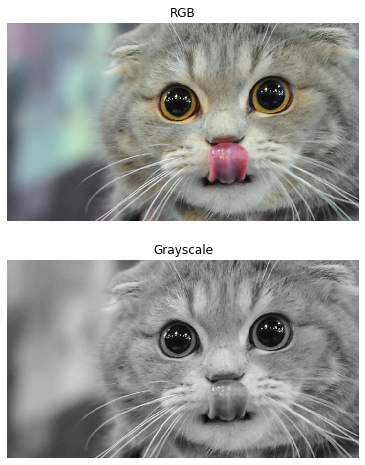

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

img = image.imread('test_images/bbc_cat.jpg')
img_gray = np.floor(np.mean(img, -1))
img_gray = img_gray.astype(np.uint8)

plt.figure(figsize=(12,8))
plt.subplot('211')
plt.axis('off')
plt.title('RGB')
plt.imshow(img)

plt.subplot('212')
plt.axis('off')
plt.title('Grayscale')
plt.imshow(img_gray, cmap='gray')
plt.show()

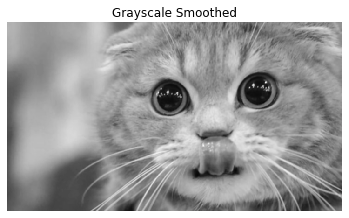

In [14]:
# Roughly implemented convolve function,
# It does not have checks to ensure validity of kernel and image
def filter2D(im, kernel):            
    filtered = np.zeros(im.shape)
    offset = np.floor(kernel.shape[0]/2)
    offset = offset.astype('int')
    for i in range(0+offset,im.shape[0]-offset):
        for j in range(0+offset, im.shape[1]-offset):
            a = im[i-offset:i+offset+1, j-offset:j+offset+1] @ kernel
            #print(a.shape)
            b = np.sum(a)
            #print(b)
            filtered[i,j] = b
            
    return im2double(filtered, np.min(filtered), np.max(filtered))

def im2double(im, min_val, max_val)    :
    return (im.astype('float')-min_val)/(max_val-min_val)

linear_smoothing = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
linear_smoothed_img_gray = filter2D(img_gray, linear_smoothing)

plt.figure(figsize=(6,8))
plt.axis('off')
plt.title('Grayscale Smoothed')
plt.imshow(linear_smoothed_img_gray, cmap='gray')
plt.show()